In [1]:
# import the packages
import numpy as np
from dfply import *
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from kmodes.kmodes import KModes

In [2]:
loc='C:/Users/pneira/Desktop/machine-learning/caracterizacion-cartera/'
dataset = df=pd.read_excel(loc+'datos-para-caracterizar-v12.xlsx',axis=False)
dataset=dataset.drop(['Anticipo_cat'], axis=1)
dataset[dataset.select_dtypes(['object']).columns] = dataset.select_dtypes(['object']).apply(lambda x: x.astype('category'))
for col in ['PRODUCTOS-MACRO','PRODUCTOS-MICRO','SERVICIOS','SERVICIOS-PERSONAS']:
    dataset[col] = dataset[col].astype('int64'); del col
dataset['ES_PYME'] = dataset['ES_PYME'].astype('int')

C:\Users\pneira\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


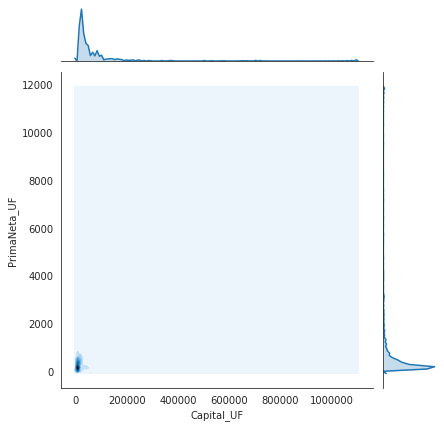

In [3]:
data=pd.DataFrame(dataset[['Capital_UF','PrimaNeta_UF']])
with sns.axes_style('white'):
    sns.jointplot(data['Capital_UF'],data['PrimaNeta_UF'], data, kind='kde');
X = preprocessing.normalize(data['PrimaNeta_UF'].values.reshape(-1,1), axis= 0)

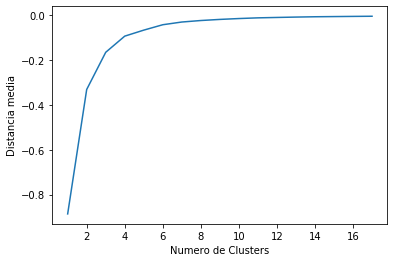

In [4]:
dfc = X
CC = range(1, 18)
kmeans = [KMeans(n_clusters=i) for i in CC]
score = [kmeans[i].fit(dfc).score(dfc) for i in range(len(kmeans))]
plt.plot(CC,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Distancia media')
plt.show()

In [5]:
#Hacemos el Cluster, siendo 6 el numero optimo
kmeans = KMeans(n_clusters=6, n_init=25, max_iter = 600, random_state=0).fit(data['PrimaNeta_UF'].values.reshape(-1,1))
centroids = kmeans.cluster_centers_
print(centroids)

[[2979.85107184]
 [  64.4567682 ]
 [9929.874     ]
 [ 479.09493051]
 [6028.91875   ]
 [1286.71413338]]


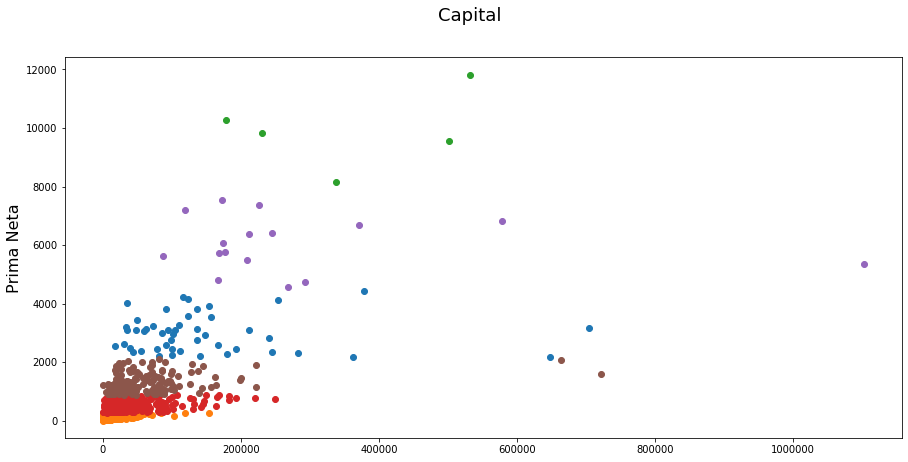

In [6]:
plt.figure(figsize=(15,7))
for i in set(kmeans.labels_):
    index = kmeans.labels_ == i
    plt.plot(data.iloc[index, 0], data.iloc[index, 1], 'o')
    plt.suptitle('Capital', fontsize=18)
    plt.xlabel('', fontsize=16)
    plt.ylabel('Prima Neta', fontsize=16)
plt.show()

In [7]:
colores=['UNO','DOS','TRES','CUATRO','CINCO','SEIS','SIETE','cyan' ]
labels = kmeans.labels_
asignar=[]
for fila in labels:
    asignar.append(colores[fila])
data['prima_neta_catkm']=asignar 
dataset['prima_neta_catkm']=asignar 
data.head()

,Capital_UF,PrimaNeta_UF,prima_neta_catkm
0,122960.44,3561.15,UNO
1,63181.00,1386.68,SEIS
2,211989.22,3082.85,UNO
3,154120.50,3902.17,UNO
4,98292.00,2751.66,UNO


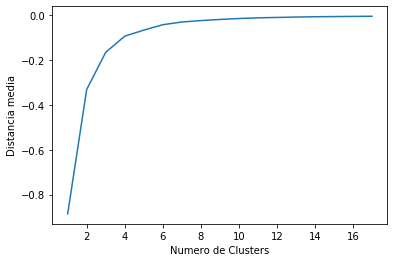

In [8]:
Y = preprocessing.normalize(data['Capital_UF'].values.reshape(-1,1), axis= 0)
dfc = X
CC = range(1, 18)
kmeans = [KMeans(n_clusters=i) for i in CC]
score = [kmeans[i].fit(dfc).score(dfc) for i in range(len(kmeans))]
plt.plot(CC,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Distancia media')
plt.show()

In [9]:
#Hacemos el Cluster, siendo 6 el numero optimo
kmeans = KMeans(n_clusters=6, n_init=25, max_iter = 600, random_state=0).fit(data['Capital_UF'].values.reshape(-1,1))
centroids = kmeans.cluster_centers_
print(centroids)

[[   2627.6603742 ]
 [ 221568.21333333]
 [ 621421.74      ]
 [  97382.77970019]
 [  32481.24197355]
 [1102052.        ]]


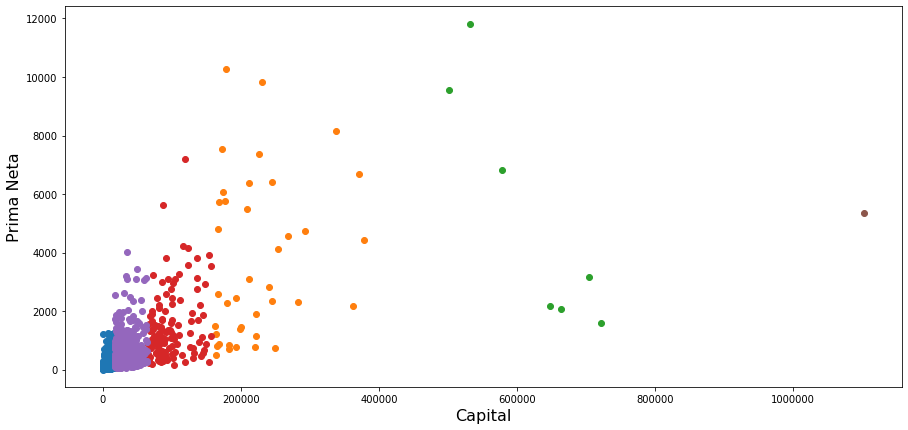

In [10]:
plt.figure(figsize=(15,7))
for i in set(kmeans.labels_):
    index = kmeans.labels_ == i
    plt.plot(data.iloc[index, 0], data.iloc[index, 1], 'o')
    plt.suptitle('', fontsize=18)
    plt.xlabel('Capital', fontsize=16)
    plt.ylabel('Prima Neta', fontsize=16)
plt.show()

In [11]:
colores=['UNO','DOS','TRES','CUATRO','CINCO','yellow','magenta','cyan' ]
labels = kmeans.labels_
asigna=[]
for fila in labels:
    asigna.append(colores[fila])
data['capital_catkm']=asigna 
dataset['capital_catkm']=asigna 
data.head()

,Capital_UF,PrimaNeta_UF,prima_neta_catkm,capital_catkm
0,122960.44,3561.15,UNO,CUATRO
1,63181.00,1386.68,SEIS,CINCO
2,211989.22,3082.85,UNO,DOS
3,154120.50,3902.17,UNO,CUATRO
4,98292.00,2751.66,UNO,CUATRO


In [12]:
data=pd.DataFrame(data[['prima_neta_catkm','capital_catkm']], dtype='str')
data['cobertura_promedio3_y']=dataset['cobertura_promedio3_y']
data=pd.DataFrame(data, dtype='str')
data.head()

,prima_neta_catkm,capital_catkm,cobertura_promedio3_y
0,UNO,CUATRO,Entre 12-24 meses
1,SEIS,CINCO,Entre 6-12 meses
2,UNO,DOS,Entre 12-24 meses
3,UNO,CUATRO,Entre 6-12 meses
4,UNO,CUATRO,Entre 6-12 meses


In [13]:
nc=5
km = KModes(n_clusters=nc, init='Cao', n_init=5, verbose=1)
clusters = km.fit_predict(data)
colores=['blue','grey','red','black','green','yellow','magenta','cyan','purple','perro' ]
labels = km.labels_
asignar=[]
for fila in labels:
    asignar.append(colores[fila])
dataset['cluster']=asignar
dataset['cluster'].value_counts()
##guardar el data set con las etiquetas
#dataset.to_excel(loc+'dataset-etiquetado-v5-'+str(nc)+'c.xlsx', index=False)
#resumen de la información por cluster
dataset['CANTIDAD DE SINIESTROS']= if_else(dataset['capital siniestrado UF'] >0,1,0)
dataset['Capital_UF']=dataset['Capital_UF'].astype('int64')
dataset['PrimaNeta_UF']=dataset['PrimaNeta_UF'].astype('int64')
dataset['Monto Indemnizacion UF']=dataset['Monto Indemnizacion UF'].astype('int64')
#dataset['Siniestrado']=dataset['Siniestrado'].astype('int64')
dataset['Tipo_Recupero']=dataset['Tipo_Recupero'].astype('int64')
dataset['capital siniestrado UF']=dataset['capital siniestrado UF'].astype('int64')
dataset.drop(labels=['RUT_std','Decada','Siniestrado'], axis=1, inplace=True)
pd.concat([dataset.groupby('cluster', as_index = False)[dataset.select_dtypes(['int64','int32']).columns].apply(lambda x: x.sum()),
           dataset.groupby('cluster', as_index = False)[dataset.select_dtypes(['float64']).columns].apply(lambda x: x.mean()),
           dataset.groupby('cluster', as_index = False)[dataset.select_dtypes(['category']).columns].apply(lambda x: x.mode()).reset_index(drop=True),
           dataset.groupby('cluster', as_index = False)['cobertura_promedio3_y'].count().rename(columns={'cobertura_promedio3_y':'N_registros'})],
          axis = 1).set_index(['cluster']).to_excel('C:/Users/pneira/Desktop/libros/Resultados/resultados-v11-'+str(nc)+'-kmixed.xlsx', sheet_name='results', float_format='%.4f',index=True)

#print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 87, cost: 2023.0
Run 1, iteration: 2/100, moves: 24, cost: 2023.0


In [14]:
dataset.head()

,capital siniestrado UF,Monto Indemnizacion UF,Tipo_Recupero,Capital_UF,PrimaNeta_UF,Venta_en_Verde,N_Polizas,ANTICIPO,CANJE DE RETENCIONES,CORRECTA EJECUCION,...,ES_PYME,PRODUCTOS-MACRO,PRODUCTOS-MICRO,SERVICIOS,SERVICIOS-PERSONAS,cobertura_promedio3_y,prima_neta_catkm,capital_catkm,cluster,CANTIDAD DE SINIESTROS
0,17808,10491,0,122960,3561,0,325,278,0,0,...,1,0,0,0,1,Entre 12-24 meses,UNO,CUATRO,grey,1
1,0,0,0,63181,1386,0,153,120,0,0,...,1,0,0,1,0,Entre 6-12 meses,SEIS,CINCO,black,0
2,193,193,193,211989,3082,0,263,112,0,0,...,0,0,1,2,3,Entre 12-24 meses,UNO,DOS,grey,1
3,0,0,0,154120,3902,0,182,110,0,0,...,1,0,0,0,1,Entre 6-12 meses,UNO,CUATRO,black,0
4,0,0,0,98292,2751,0,149,106,0,0,...,1,0,0,0,2,Entre 6-12 meses,UNO,CUATRO,black,0


C:\Users\pneira\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


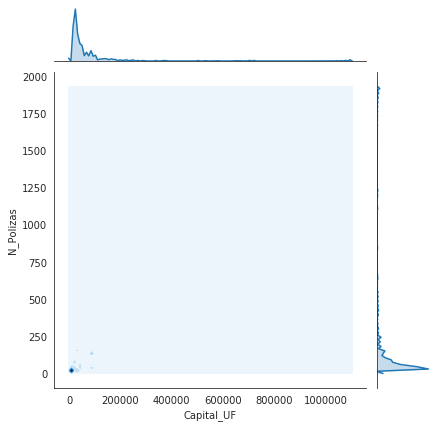

In [15]:
data=pd.DataFrame(dataset[['Capital_UF','PrimaNeta_UF','N_Polizas']])
with sns.axes_style('white'):
    sns.jointplot(data['Capital_UF'],data['N_Polizas'], data, kind='kde');

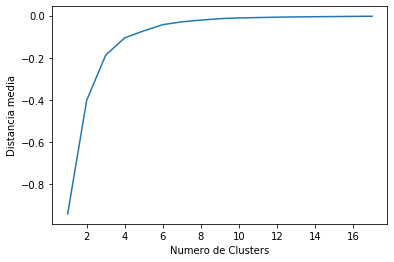

In [16]:
Z = preprocessing.normalize(data['N_Polizas'].values.reshape(-1,1), axis= 0)
dfc = Z
CC = range(1, 18)
kmeans = [KMeans(n_clusters=i) for i in CC]
score = [kmeans[i].fit(dfc).score(dfc) for i in range(len(kmeans))]
plt.plot(CC,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Distancia media')
plt.show()